<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_6)_n120_01_ipynb1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.298275,89.168836,66.419896,-36.735299,153.151707,182.953933,-29.802225
1,0.0,1.0,79.733570,20.401260,28.653424,8.371401,147.159655,150.696887,-3.537233
2,0.0,2.0,53.848024,85.323462,22.614568,29.044502,200.830556,186.874928,13.955628
3,0.0,3.0,89.067140,57.246276,29.538091,3.729058,189.580564,201.430155,-11.849591
4,0.0,4.0,80.193376,83.195670,54.889737,-19.905575,208.373208,234.041970,-25.668762
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.561860,44.238571,51.251160,1.983306,174.034897,167.526592,6.508305
119996,999.0,116.0,54.926598,55.813571,59.268155,1.057361,181.065684,176.822063,4.243621
119997,999.0,117.0,98.130694,58.321197,59.202459,12.870909,238.525260,221.140877,17.384383
119998,999.0,118.0,77.497054,49.033916,30.450373,-24.928425,142.052918,159.944592,-17.891674


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.298275,89.168836,66.419896,-36.735299,153.151707,182.953933,-29.802225
1,0.0,1.0,79.733570,20.401260,28.653424,8.371401,147.159655,150.696887,-3.537233
2,0.0,2.0,53.848024,85.323462,22.614568,29.044502,200.830556,186.874928,13.955628
3,0.0,3.0,89.067140,57.246276,29.538091,3.729058,189.580564,201.430155,-11.849591
4,0.0,4.0,80.193376,83.195670,54.889737,-19.905575,208.373208,234.041970,-25.668762
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.561860,44.238571,51.251160,1.983306,174.034897,167.526592,6.508305
119996,999.0,116.0,54.926598,55.813571,59.268155,1.057361,181.065684,176.822063,4.243621
119997,999.0,117.0,98.130694,58.321197,59.202459,12.870909,238.525260,221.140877,17.384383
119998,999.0,118.0,77.497054,49.033916,30.450373,-24.928425,142.052918,159.944592,-17.891674


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    24.298275  89.168836  66.419896  ...  153.151707  182.953933 -29.802225
      1.0    79.733570  20.401260  28.653424  ...  147.159655  150.696887  -3.537233
      2.0    53.848024  85.323462  22.614568  ...  200.830556  186.874928  13.955628
      3.0    89.067140  57.246276  29.538091  ...  189.580564  201.430155 -11.849591
      4.0    80.193376  83.195670  54.889737  ...  208.373208  234.041970 -25.668762
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  66.561860  44.238571  51.251160  ...  174.034897  167.526592   6.508305
      116.0  54.926598  55.813571  59.268155  ...  181.065684  176.822063   4.243621
      117.0  98.130694  58.321197  59.202459  ...  238.525260  221.140877  17.384383
      118.0  77.497054  49.033916  30.450373  ...  142.052918  159.944592 -17.891674
      119.0  45.841796  44.341201  62.889405  ...  146.461845  160.436682 -13.974837

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    24.298275  89.168836  66.419896  ...  153.151707  182.953933 -29.802225
      1.0    79.733570  20.401260  28.653424  ...  147.159655  150.696887  -3.537233
      2.0    53.848024  85.323462  22.614568  ...  200.830556  186.874928  13.955628
      3.0    89.067140  57.246276  29.538091  ...  189.580564  201.430155 -11.849591
      4.0    80.193376  83.195670  54.889737  ...  208.373208  234.041970 -25.668762
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  66.561860  44.238571  51.251160  ...  174.034897  167.526592   6.508305
      116.0  54.926598  55.813571  59.268155  ...  181.065684  176.822063   4.243621
      117.0  98.130694  58.321197  59.202459  ...  238.525260  221.140877  17.384383
      118.0  77.497054  49.033916  30.450373  ...  142.052918  159.944592 -17.891674
      119.0  45.841796  44.341201  62.889405  ...  146.461845  160.436682 -13.974837

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.298275,89.168836,66.419896,-36.735299,153.151707,182.953933,-29.802225
1,0.0,1.0,79.733570,20.401260,28.653424,8.371401,147.159655,150.696887,-3.537233
2,0.0,2.0,53.848024,85.323462,22.614568,29.044502,200.830556,186.874928,13.955628
3,0.0,3.0,89.067140,57.246276,29.538091,3.729058,189.580564,201.430155,-11.849591
4,0.0,4.0,80.193376,83.195670,54.889737,-19.905575,208.373208,234.041970,-25.668762
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,66.561860,44.238571,51.251160,1.983306,174.034897,167.526592,6.508305
119996,999.0,116.0,54.926598,55.813571,59.268155,1.057361,181.065684,176.822063,4.243621
119997,999.0,117.0,98.130694,58.321197,59.202459,12.870909,238.525260,221.140877,17.384383
119998,999.0,118.0,77.497054,49.033916,30.450373,-24.928425,142.052918,159.944592,-17.891674


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    24.298275  89.168836  66.419896  ...  153.151707  182.953933 -29.802225
      1.0    79.733570  20.401260  28.653424  ...  147.159655  150.696887  -3.537233
      2.0    53.848024  85.323462  22.614568  ...  200.830556  186.874928  13.955628
      3.0    89.067140  57.246276  29.538091  ...  189.580564  201.430155 -11.849591
      4.0    80.193376  83.195670  54.889737  ...  208.373208  234.041970 -25.668762
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  66.561860  44.238571  51.251160  ...  174.034897  167.526592   6.508305
      116.0  54.926598  55.813571  59.268155  ...  181.065684  176.822063   4.243621
      117.0  98.130694  58.321197  59.202459  ...  238.525260  221.140877  17.384383
      118.0  77.497054  49.033916  30.450373  ...  142.052918  159.944592 -17.891674
      119.0  45.841796  44.341201  62.889405  ...  146.461845  160.436682 -13.974837

[120000 rows x 7 columns]

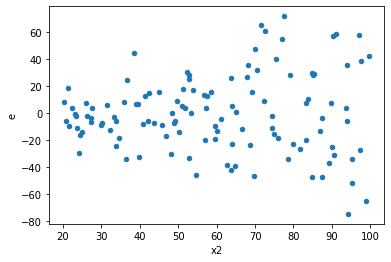

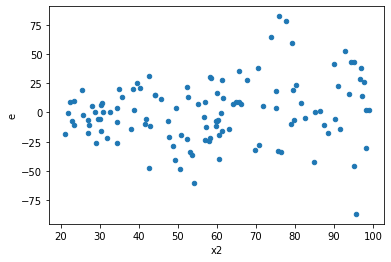

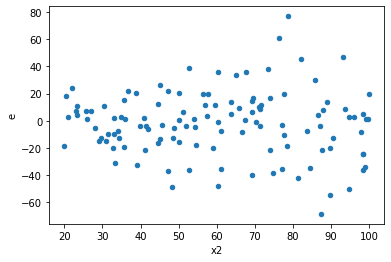

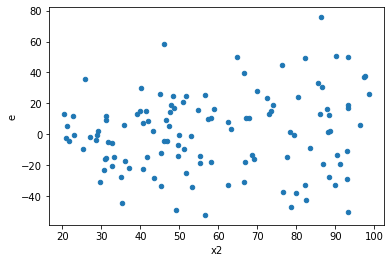

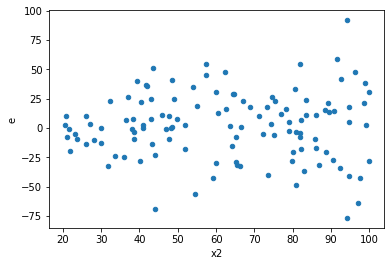

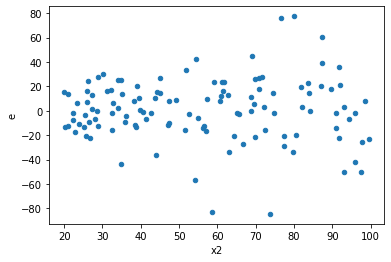

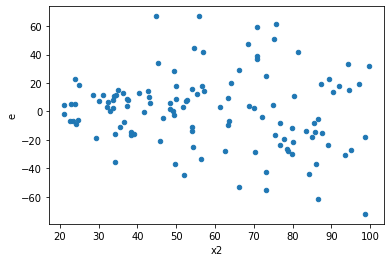

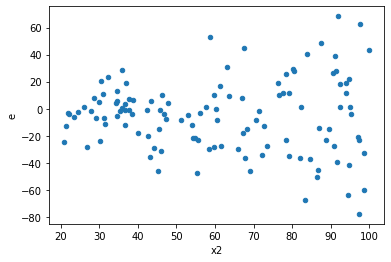

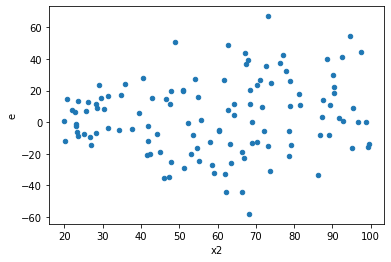

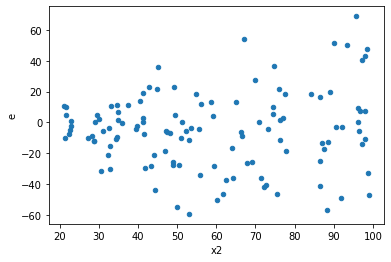

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,45746.4557607523,9673.789137236587,1039.692176380734,219.85884402810424,4.728907681547856,7.292002226488847e-07,0.9999996353998887,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,51072.382678995804,15430.114418775236,1160.7359699771773,350.6844186085281,3.309916005344157,0.00010336121873177895,0.9999483193906341,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,38865.62023558995,12432.605315296718,883.3095508088626,282.55921171128904,3.1261042436351465,0.0002102845248868057,0.9998948577375566,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,40019.42439931767,16545.765202122748,909.5323727117652,376.04011823006243,2.418711006136081,0.0037266402117204223,0.9981366798941398,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,48559.201622232154,20878.203827900208,1103.6182186870944,474.50463245227746,2.325832337997436,0.0055121739092443,0.9972439130453778,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,42555.55513997053,11826.94687972032,967.1717077266029,268.7942472663709,3.598186038439099,3.505552177451854e-05,0.9999824722391127,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,42078.95733127318,13516.91675008446,956.3399393471177,307.20265341101043,3.113058851310174,0.00022129088754097026,0.9998893545562295,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,54171.13087818328,10632.3887225865,1231.1620654132564,241.64519824060227,5.094916325162845,2.3357129541601296e-07,0.9999998832143523,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,29289.671267182282,14168.310306916474,665.6743469814155,322.00705242991984,2.0672663594108385,0.016546313382559852,0.9917268433087201,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,45746.4557607523,9673.789137236587,1039.692176380734,219.85884402810424,4.728907681547856,7.292002226488847e-07,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,51072.382678995804,15430.114418775236,1160.7359699771773,350.6844186085281,3.309916005344157,0.00010336121873177895,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,38865.62023558995,12432.605315296718,883.3095508088626,282.55921171128904,3.1261042436351465,0.0002102845248868057,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,40019.42439931767,16545.765202122748,909.5323727117652,376.04011823006243,2.418711006136081,0.0037266402117204223,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,48559.201622232154,20878.203827900208,1103.6182186870944,474.50463245227746,2.325832337997436,0.0055121739092443,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,42555.55513997053,11826.94687972032,967.1717077266029,268.7942472663709,3.598186038439099,3.505552177451854e-05,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,42078.95733127318,13516.91675008446,956.3399393471177,307.20265341101043,3.113058851310174,0.00022129088754097026,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,54171.13087818328,10632.3887225865,1231.1620654132564,241.64519824060227,5.094916325162845,2.3357129541601296e-07,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,29289.671267182282,14168.310306916474,665.6743469814155,322.00705242991984,2.0672663594108385,0.016546313382559852,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    952
Reject001=1 : Homoscedasticity       48
Name: Result_test, dtype: int64